# Now we are going to see if there is a relationship between the weather and the demand...

Technological advances and environmental concerns have contributed to this development.However, with the growth of these systems, companies have the need to meet the increasing demand. Therefore, operating companies are always are always exploring the right tools for flow prediction.

In [2]:
import pandas as pd
df=pd.read_csv("phil_weathermerged.csv")
df
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()
import seaborn as sns


from datetime import datetime #for working with times objects
from datetime import timedelta #for working with times objects
import math
import random
#import timeit

In [4]:
phil = pd.read_csv("phil_weathermerged.csv")
phil.count()
# we have merged in the same table phil and weather data 

Unnamed: 0                 1010733
starttime_weather          1010733
trip_id                    1010733
duration                   1010733
start_time                 1010733
end_time                   1010733
start_station              1010733
end_station                1010733
bike_id                    1010733
plan_duration              1010733
trip_route_category        1010733
passholder_type            1010733
bike_type                  1010733
Date_s                     1010733
Weekday_s                  1010733
Hour_s                     1010733
Date_e                     1010733
Weekday_e                  1010733
Hour_e                     1010733
start_coordinates          1010733
end_coordinates            1010733
start_time_weather         1010733
temperature                1010733
cloud_cover                1010733
cloud_cover_description    1010733
pressure                   1010733
windspeed                  1010733
precipitation              1010733
felt_temperature    

In [5]:
phil

,Unnamed: 0,starttime_weather,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,...,start_coordinates,end_coordinates,start_time_weather,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,0,2021-01-01 02:00:00,365186730,11,2021-01-01 02:20:00,2021-01-01 02:31:00,3124,3069,3640,30,...,"39.953651,-75.14045","39.937038,-75.150383",2021-01-01 00:54:00,5.0,26.0,Cloudy,1027.19,11.0,0.0,2.0
1,1,2021-01-01 02:00:00,365186730,11,2021-01-01 02:20:00,2021-01-01 02:31:00,3124,3069,3640,30,...,"39.953651,-75.14045","39.937038,-75.150383",2021-01-01 01:54:00,4.0,26.0,Cloudy,1028.20,19.0,0.0,0.0
2,2,2021-01-01 02:00:00,365186730,11,2021-01-01 02:20:00,2021-01-01 02:31:00,3124,3069,3640,30,...,"39.953651,-75.14045","39.937038,-75.150383",2021-01-01 02:54:00,3.0,29.0,Partly Cloudy,1028.88,20.0,0.0,-2.0
3,3,2021-01-01 02:00:00,365186730,11,2021-01-01 02:20:00,2021-01-01 02:31:00,3124,3069,3640,30,...,"39.953651,-75.14045","39.937038,-75.150383",2021-01-01 03:54:00,2.0,27.0,Mostly Cloudy,1029.90,17.0,0.0,-2.0
4,4,2021-01-01 02:00:00,365186730,11,2021-01-01 02:20:00,2021-01-01 02:31:00,3124,3069,3640,30,...,"39.953651,-75.14045","39.937038,-75.150383",2021-01-01 04:54:00,2.0,33.0,Fair,1029.90,13.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010728,1010728,2021-01-16 13:00:00,366031436,14,2021-01-16 13:59:00,2021-01-16 14:13:00,3066,3046,11833,365,...,"39.94561,-75.173477","39.950119,-75.144722",2022-09-09 19:54:00,29.0,30.0,Partly Cloudy,1017.37,11.0,0.0,28.0
1010729,1010729,2021-01-16 13:00:00,366031436,14,2021-01-16 13:59:00,2021-01-16 14:13:00,3066,3046,11833,365,...,"39.94561,-75.173477","39.950119,-75.144722",2022-09-09 20:54:00,28.0,34.0,Fair,1017.71,9.0,0.0,27.0
1010730,1010730,2021-01-16 13:00:00,366031436,14,2021-01-16 13:59:00,2021-01-16 14:13:00,3066,3046,11833,365,...,"39.94561,-75.173477","39.950119,-75.144722",2022-09-09 21:54:00,28.0,34.0,Fair,1017.71,13.0,0.0,27.0
1010731,1010731,2021-01-16 13:00:00,366031436,14,2021-01-16 13:59:00,2021-01-16 14:13:00,3066,3046,11833,365,...,"39.94561,-75.173477","39.950119,-75.144722",2022-09-09 22:54:00,26.0,34.0,Fair,1018.72,9.0,0.0,26.0


In [6]:
# drop the column we don't need
phil.drop('Unnamed: 0',axis=1, inplace=True)
phil

,starttime_weather,trip_id,duration,start_time,end_time,start_station,end_station,bike_id,plan_duration,trip_route_category,...,start_coordinates,end_coordinates,start_time_weather,temperature,cloud_cover,cloud_cover_description,pressure,windspeed,precipitation,felt_temperature
0,2021-01-01 02:00:00,365186730,11,2021-01-01 02:20:00,2021-01-01 02:31:00,3124,3069,3640,30,One Way,...,"39.953651,-75.14045","39.937038,-75.150383",2021-01-01 00:54:00,5.0,26.0,Cloudy,1027.19,11.0,0.0,2.0
1,2021-01-01 02:00:00,365186730,11,2021-01-01 02:20:00,2021-01-01 02:31:00,3124,3069,3640,30,One Way,...,"39.953651,-75.14045","39.937038,-75.150383",2021-01-01 01:54:00,4.0,26.0,Cloudy,1028.20,19.0,0.0,0.0
2,2021-01-01 02:00:00,365186730,11,2021-01-01 02:20:00,2021-01-01 02:31:00,3124,3069,3640,30,One Way,...,"39.953651,-75.14045","39.937038,-75.150383",2021-01-01 02:54:00,3.0,29.0,Partly Cloudy,1028.88,20.0,0.0,-2.0
3,2021-01-01 02:00:00,365186730,11,2021-01-01 02:20:00,2021-01-01 02:31:00,3124,3069,3640,30,One Way,...,"39.953651,-75.14045","39.937038,-75.150383",2021-01-01 03:54:00,2.0,27.0,Mostly Cloudy,1029.90,17.0,0.0,-2.0
4,2021-01-01 02:00:00,365186730,11,2021-01-01 02:20:00,2021-01-01 02:31:00,3124,3069,3640,30,One Way,...,"39.953651,-75.14045","39.937038,-75.150383",2021-01-01 04:54:00,2.0,33.0,Fair,1029.90,13.0,0.0,-2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1010728,2021-01-16 13:00:00,366031436,14,2021-01-16 13:59:00,2021-01-16 14:13:00,3066,3046,11833,365,One Way,...,"39.94561,-75.173477","39.950119,-75.144722",2022-09-09 19:54:00,29.0,30.0,Partly Cloudy,1017.37,11.0,0.0,28.0
1010729,2021-01-16 13:00:00,366031436,14,2021-01-16 13:59:00,2021-01-16 14:13:00,3066,3046,11833,365,One Way,...,"39.94561,-75.173477","39.950119,-75.144722",2022-09-09 20:54:00,28.0,34.0,Fair,1017.71,9.0,0.0,27.0
1010730,2021-01-16 13:00:00,366031436,14,2021-01-16 13:59:00,2021-01-16 14:13:00,3066,3046,11833,365,One Way,...,"39.94561,-75.173477","39.950119,-75.144722",2022-09-09 21:54:00,28.0,34.0,Fair,1017.71,13.0,0.0,27.0
1010731,2021-01-16 13:00:00,366031436,14,2021-01-16 13:59:00,2021-01-16 14:13:00,3066,3046,11833,365,One Way,...,"39.94561,-75.173477","39.950119,-75.144722",2022-09-09 22:54:00,26.0,34.0,Fair,1018.72,9.0,0.0,26.0


## Graphics showing the rides according to the temperature

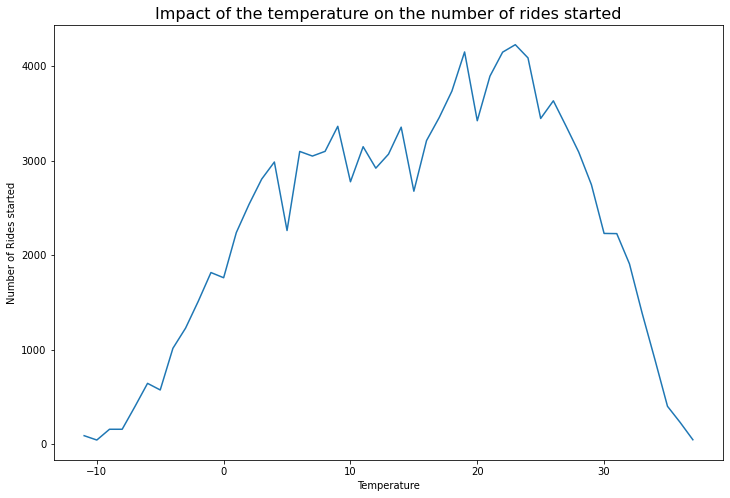

In [8]:
phil_Date_avail = phil.groupby("temperature")["start_time"].nunique() 

fig,ax = plt.subplots(figsize=(12,8)) 

ax.plot(phil_Date_avail)
ax.set_title("Impact of the temperature on the number of rides started",fontsize=16)
ax.set_xlabel("Temperature")
ax.set_ylabel("Number of Rides started")

plt.show()
fig.savefig("temperatureImpactOnRides.pdf")

# less rides in negative and low temperatures  and increase in 5 degrees to decrease again in 15 degrees and 
##when it begin to be too hot the rides decrease significantly

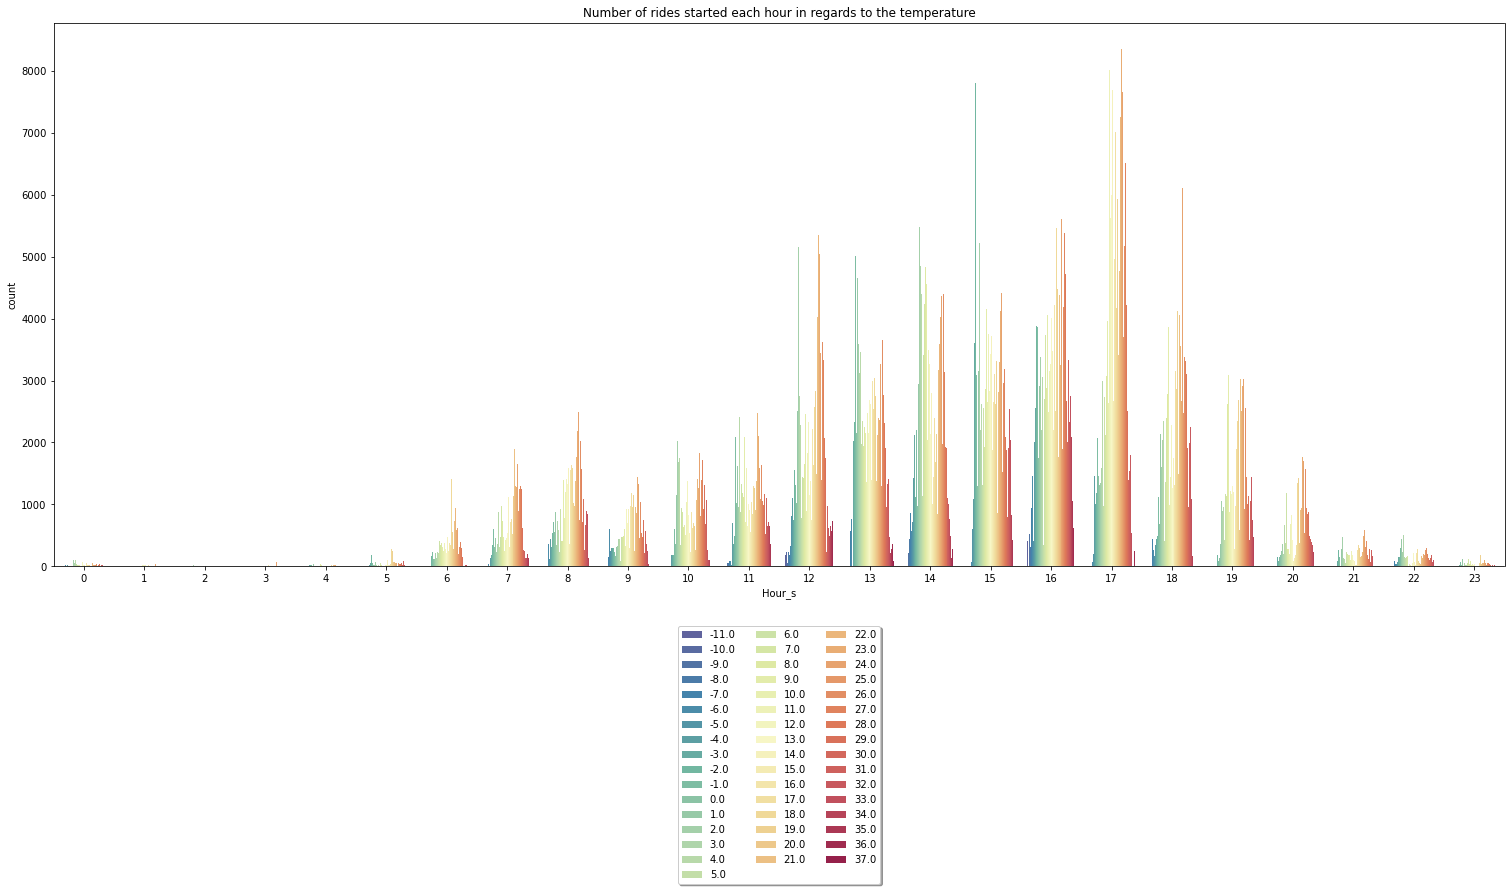

In [10]:
#more detailed graph of the use of the bike seeing the temperature in the day
fig = plt.figure(figsize=(26,10))

sns.countplot(x = 'Hour_s', hue = 'temperature', data = phil, palette = 'Spectral_r')
plt.title('Number of rides started each hour in regards to the temperature')

plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
plt.show()

fig.savefig("UsageOfBikesWithTemperatures.pdf")

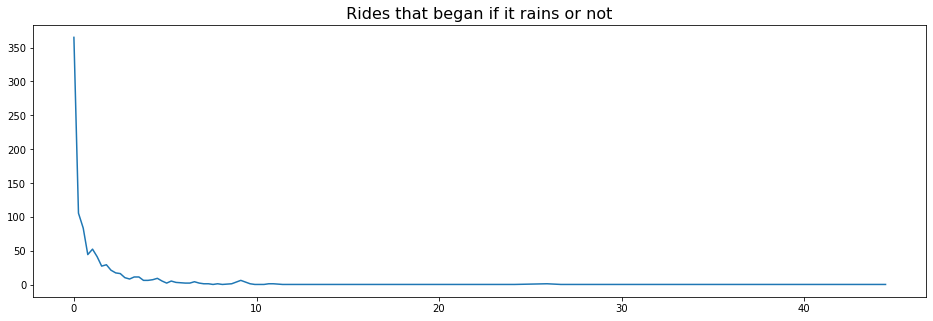

In [14]:
phil_Date_avail = phil.groupby("precipitation")["starttime_weather"].nunique() 

fig,ax = plt.subplots(figsize=(16,5)) 

ax.plot(phil_Date_avail)
ax.set_title(" Rides that began if it rains or not ",fontsize=16)

plt.show()

# less rides when it rains 

## Amount of rides depending on the temperature...

In [22]:
#demand: very low temperatures no much rides -higher temperature more rides
demand = phil.groupby(['temperature']).starttime_weather.count().reset_index(name = "Rides")
demand

,temperature,Rides
0,-11.0,593
1,-10.0,236
2,-9.0,852
3,-8.0,1040
4,-7.0,3283
5,-6.0,4676
6,-5.0,3384
7,-4.0,10431
8,-3.0,14353
9,-2.0,21302


At which temperature are the most rides registered?

In [23]:
print(demand[demand.Rides == demand.Rides.max()])

    temperature  Rides
35         24.0  50062


The peak demand seems to be at 24 degrees!

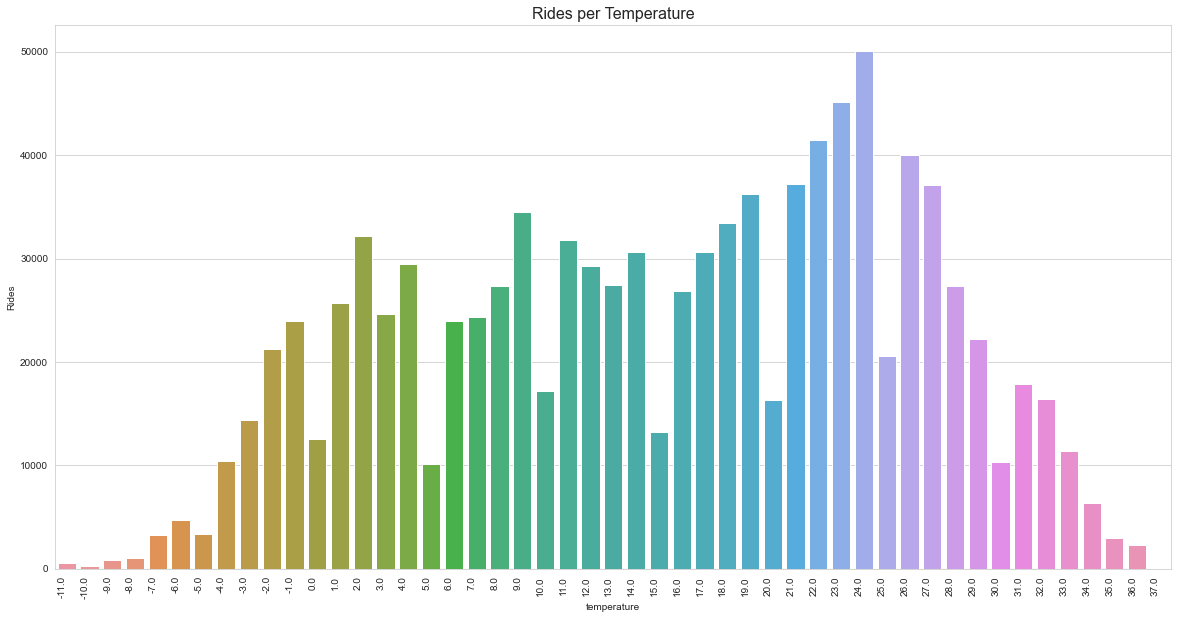

In [25]:
ig = plt.figure(figsize=(20,10))

sns.set_style("whitegrid")
plot = sns.barplot(data=demand, x = "temperature", y = "Rides" )

plot.set_title("Rides per Temperature",fontsize=16)
plot.set_xticklabels(plot.get_xticklabels(), rotation=90, horizontalalignment='right')

#plt.legend(loc = 'upper center', bbox_to_anchor = (0.5,-0.1), ncol = 3, fancybox = True, shadow = True)
plt.show(block=True);
fig.savefig("ridesPerTemperature.pdf")

## Amount of rides depending if it rains or no ...

In [27]:
#rides with the rain 
# precip =1 it rains 
# precip= 0 doesn't rain

demand2 = phil.groupby(['precipitation']).starttime_weather.count().reset_index(name = "Rides")
demand2

,precipitation,Rides
0,0.00,948169
1,0.25,17178
2,0.51,11632
3,0.76,4911
4,1.02,4308
5,1.27,3489
6,1.52,2665
7,1.78,2949
8,2.03,1813
9,2.29,1141
